In [1]:
# 패키지 임포트
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud

# 스타일 설정
sns.set(style="whitegrid")
plt.rcParams["font.family"] = "Malgun Gothic"  # Windows 기준 한글 폰트
plt.rcParams["axes.unicode_minus"] = False     # 마이너스(-) 깨짐 방지

# 샘플로 테스트

In [23]:
# 데이터 불러오기
df = pd.read_pickle("../results/sample_emotion_analysis.pkl")

# 감정군 목록
all_emotions = ["love", "sadness", "anger", "hope", "surprise"]

## 감정 단어 기반 특징 추출 시각화

### 감정군별 감정 단어 수 합계

C:\Users\박상춘\AppData\Local\Temp\ipykernel_27000\3018010913.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=list(emotion_totals.keys()), y=list(emotion_totals.values()), palette="Blues_d")


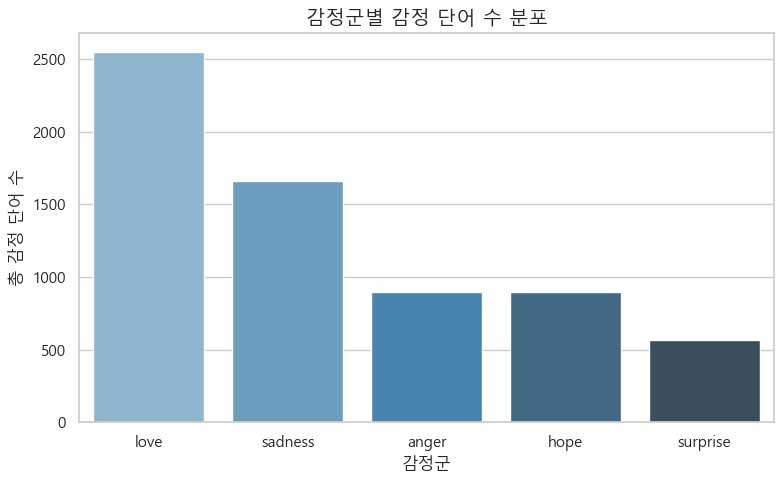

In [ ]:
emotion_totals = {emo: df[f"count_{emo}"].sum() for emo in all_emotions}

# 시각화
plt.figure(figsize=(8, 5))
sns.barplot(x=list(emotion_totals.keys()), y=list(emotion_totals.values()), palette="Blues_d")
plt.title("감정군별 감정 단어 수 분포", fontsize=14)
plt.xlabel("감정군")
plt.ylabel("총 감정 단어 수")
plt.tight_layout()
plt.show()

### 감정군별 비율 분포

C:\Users\박상춘\AppData\Local\Temp\ipykernel_27000\2480340026.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=list(emotion_ratios.keys()), y=list(emotion_ratios.values()), palette="Oranges_d")


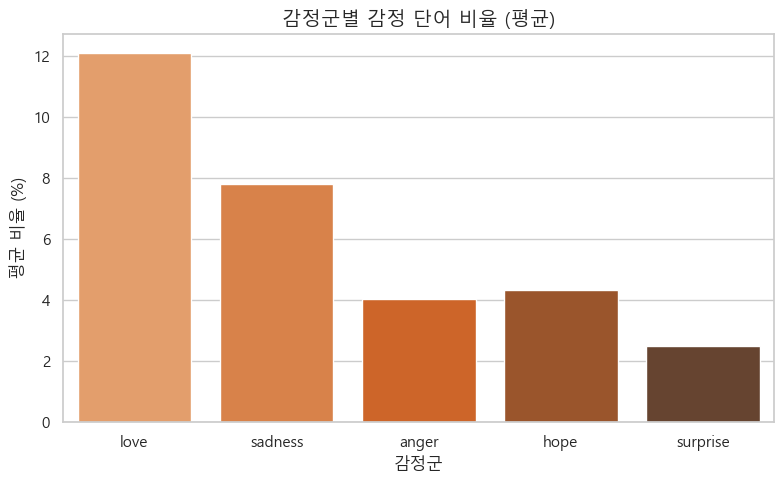

In [ ]:
# 전체적으로 어떤 감정이 더 두드러졌는지 알 수 있음
emotion_ratios = {emo: df[f"ratio_{emo}"].mean() for emo in all_emotions}

# 시각화
plt.figure(figsize=(8, 5))
sns.barplot(x=list(emotion_ratios.keys()), y=list(emotion_ratios.values()), palette="Oranges_d")
plt.title("감정군별 감정 단어 비율 (평균)", fontsize=14)
plt.xlabel("감정군")
plt.ylabel("평균 비율 (%)")
plt.tight_layout()
plt.show()

### 감정 단어 WordCloud

#### 전체 감정 단어 WordCloud

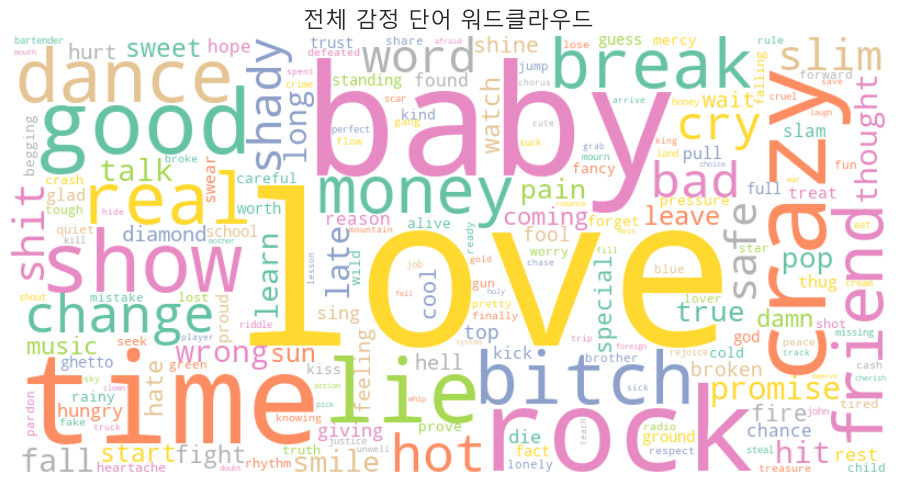

In [49]:
from wordcloud import WordCloud

# 전체 감정 단어 모으기
all_words = [word for sublist in df["emotion_words"].dropna() for word in sublist]
all_emotion_words = " ".join(all_words)

# 워드클라우드 생성
wordcloud = WordCloud(width=800, height=400, collocations=False, background_color='white', colormap='Set2').generate(all_emotion_words)

# 시각화
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title("전체 감정 단어 워드클라우드", fontsize=16)
plt.tight_layout()
plt.show()

#### 감정군별 감정 단어 WordCloud

In [18]:
# 사용자 정의 감정군 맵
custom_emotion_map = {
    "joy": "love",
    "trust": "love",
    "positive": "love",

    "sadness": "sadness",
    "fear": "sadness",
    "negative": "sadness",

    "anger": "anger",
    "disgust": "anger",

    "anticipation": "hope",
    "surprise": "surprise",
}

# 감정 사전 로딩
lexicon_path = "../data/NRC-Emotion-Lexicon-Wordlevel-v0.92.txt"
word_to_emotions = {}

with open(lexicon_path, "r", encoding="utf-8") as f:
    for line in f:
        word, emotion, association = line.strip().split("\t")
        if int(association) == 1:
            mapped_emotion = custom_emotion_map.get(emotion)
            if mapped_emotion:
                word_to_emotions.setdefault(word, set()).add(mapped_emotion)


In [ ]:
from collections import defaultdict
from wordcloud import WordCloud

# 감정 단어 문자열을 리스트로 다시 변환
df["emotion_words"] = df["emotion_words"].apply(lambda x: x.split(", "))

In [50]:
# 감정 단어 기반 사전 만들기 (앞서 작성한 코드)
emotion_word_dict = defaultdict(list)
for word_list in df["emotion_words"]:
    for word in word_list:
        if word in word_to_emotions:
            for emo in word_to_emotions[word]:
                emotion_word_dict[emo].append(word)

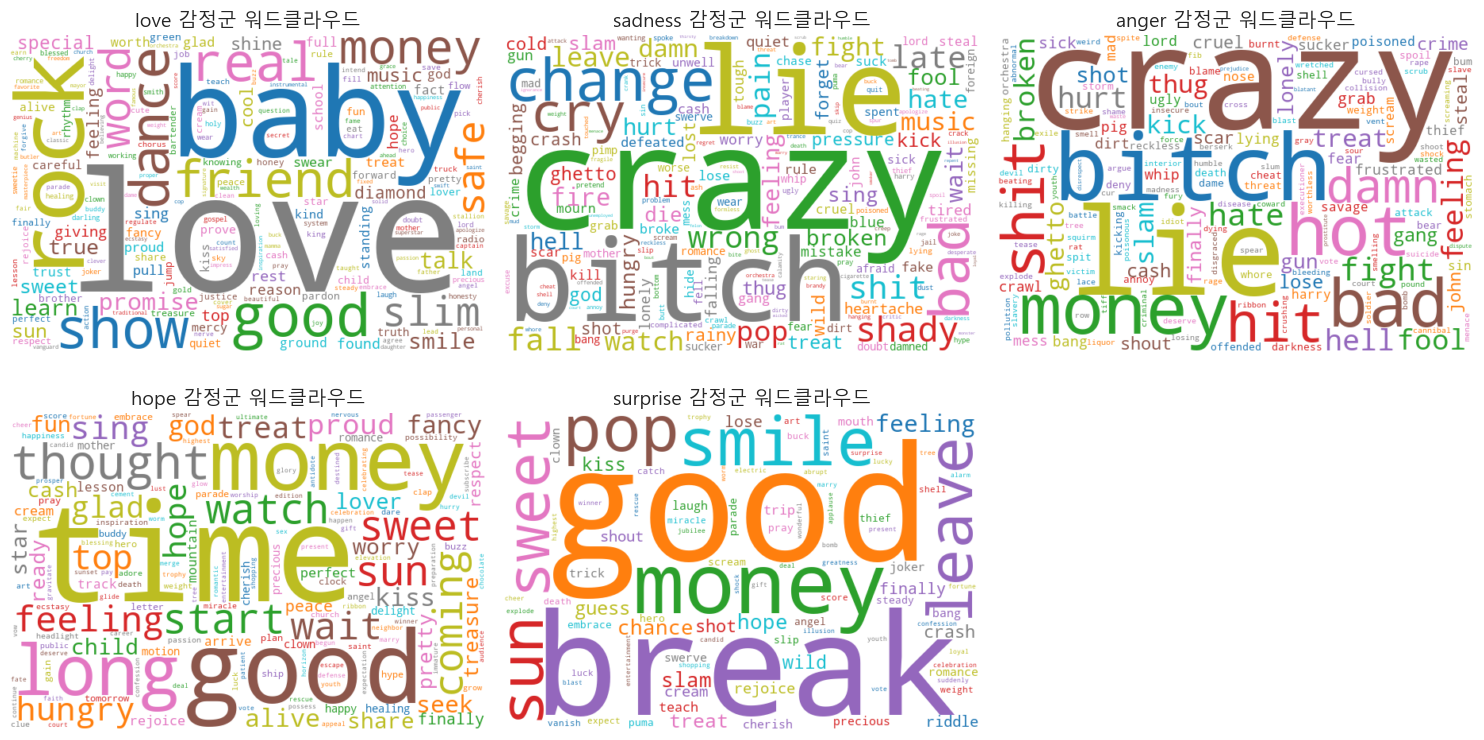

In [51]:
# 감정군별 워드클라우드 시각화
n_cols = 3
n_rows = (len(all_emotions) + n_cols - 1) // n_cols

plt.figure(figsize=(15, 4 * n_rows))
for i, emo in enumerate(all_emotions):
    text = " ".join(emotion_word_dict[emo])
    wc = WordCloud(width=600, height=400, collocations=False, background_color='white', colormap='tab10').generate(text)

    plt.subplot(n_rows, n_cols, i + 1)
    plt.imshow(wc, interpolation="bilinear")
    plt.axis("off")
    plt.title(f"{emo} 감정군 워드클라우드", fontsize=14)

plt.tight_layout()
plt.show()

### 곡별 주요 감정 바 차트 (top-N 감정 단어 분포)

In [52]:
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter

# 곡별 상위 감정 단어 시각화 함수
def plot_top_emotion_words_per_song(df, n_songs=5, top_n=5):
    selected_df = df.dropna(subset=["emotion_words"]).sample(n_songs, random_state=42)
    
    for idx, row in selected_df.iterrows():
        word_counts = Counter(row["emotion_words"])
        top_words = word_counts.most_common(top_n)
        words, counts = zip(*top_words)

        plt.figure(figsize=(6, 4))
        sns.barplot(x=list(counts), y=list(words), palette="Set2")
        plt.title(f"{row['title']} - {row['artist']}", fontsize=13)
        plt.xlabel("등장 횟수")
        plt.ylabel("감정 단어")
        plt.tight_layout()
        plt.show()

C:\Users\박상춘\AppData\Local\Temp\ipykernel_27000\348349991.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=list(counts), y=list(words), palette="Set2")


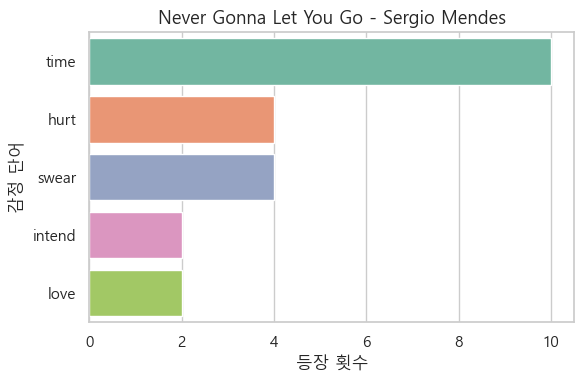

C:\Users\박상춘\AppData\Local\Temp\ipykernel_27000\348349991.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=list(counts), y=list(words), palette="Set2")


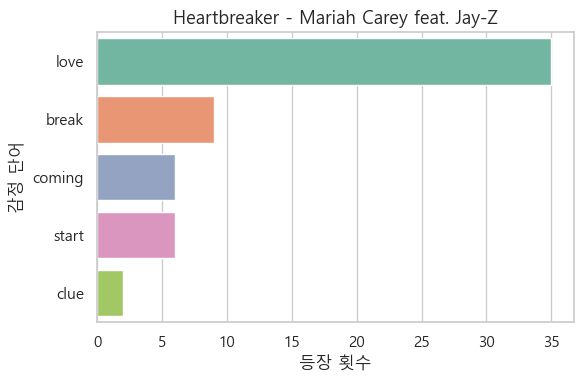

C:\Users\박상춘\AppData\Local\Temp\ipykernel_27000\348349991.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=list(counts), y=list(words), palette="Set2")


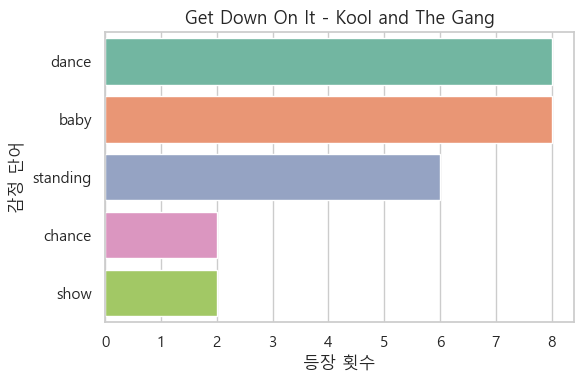

C:\Users\박상춘\AppData\Local\Temp\ipykernel_27000\348349991.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=list(counts), y=list(words), palette="Set2")


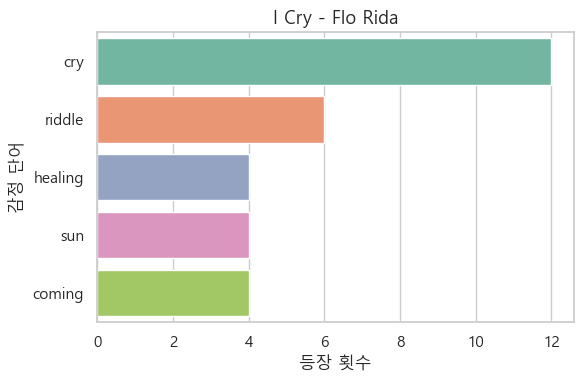

C:\Users\박상춘\AppData\Local\Temp\ipykernel_27000\348349991.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=list(counts), y=list(words), palette="Set2")


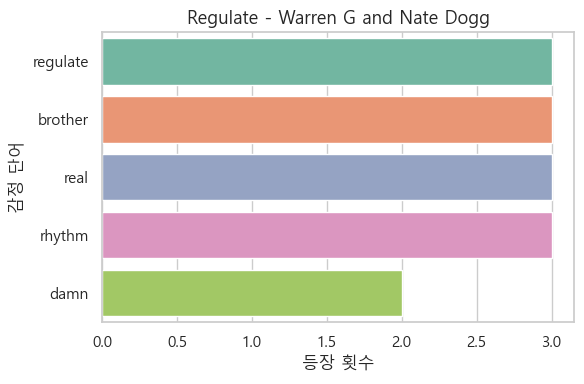

In [53]:
plot_top_emotion_words_per_song(df, n_songs=5, top_n=5)

### 감정군별 감정 단어 수 상관관계 히트맵

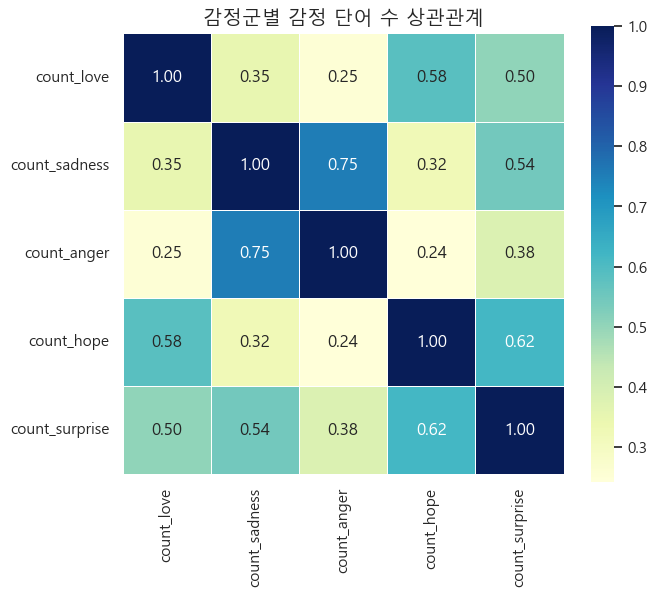

In [54]:
import numpy as np

# 감정 단어 수 컬럼들만 추출
count_cols = [f"count_{emo}" for emo in all_emotions]
emotion_counts = df[count_cols]

# 상관계수 계산
corr_matrix = emotion_counts.corr()

# 히트맵 시각화
plt.figure(figsize=(7, 6))
sns.heatmap(corr_matrix, annot=True, cmap="YlGnBu", fmt=".2f", square=True, linewidths=.5)
plt.title("감정군별 감정 단어 수 상관관계", fontsize=14)
plt.tight_layout()
plt.show()

## 감정 점수 기반 시각화

### 감정 점수 분포 히스토그램

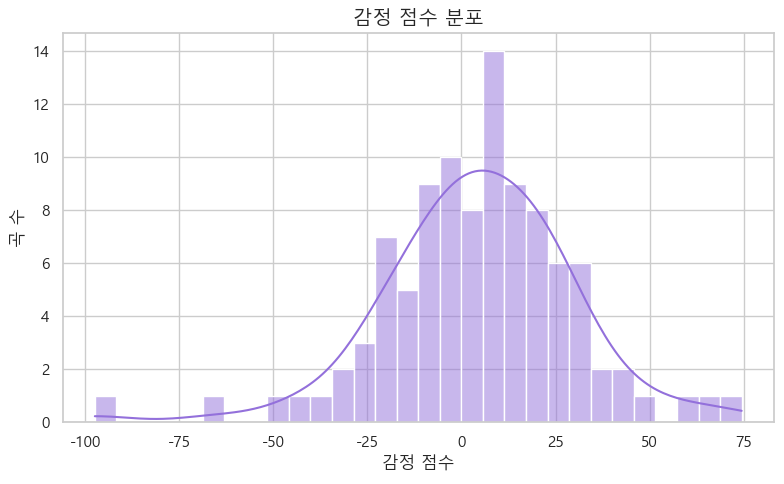

In [ ]:
plt.figure(figsize=(8, 5))
sns.histplot(df["emotion_score"], bins=30, kde=True, color="mediumpurple")
plt.title("감정 점수 분포", fontsize=14)
plt.xlabel("감정 점수")
plt.ylabel("곡 수")
plt.tight_layout()
plt.show()

### 감정군별 평균 감정 점수 계산

C:\Users\박상춘\AppData\Local\Temp\ipykernel_27000\586647451.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=list(avg_scores_by_emotion.keys()), y=list(avg_scores_by_emotion.values()), palette="coolwarm")


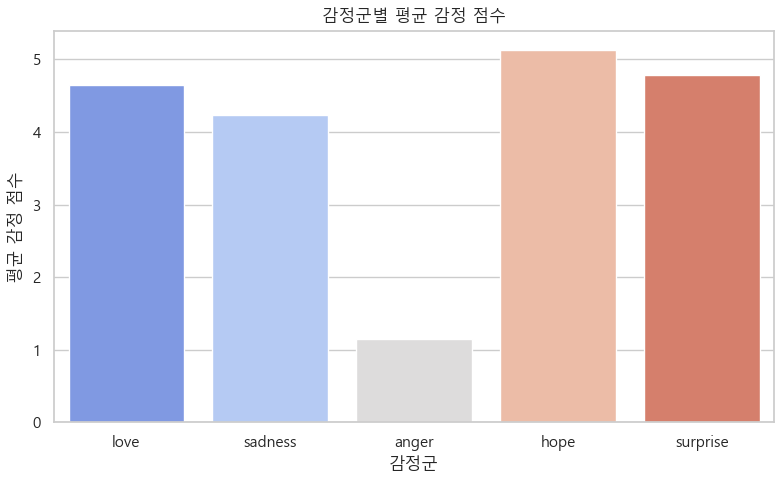

In [ ]:
avg_scores_by_emotion = {}
for emo in all_emotions:
    mask = df[f"count_{emo}"] > 0  # 해당 감정 단어가 존재하는 곡만
    avg_score = df[mask]["emotion_score"].mean()
    avg_scores_by_emotion[emo] = round(avg_score, 2)

# 시각화
plt.figure(figsize=(8, 5))
sns.barplot(x=list(avg_scores_by_emotion.keys()), y=list(avg_scores_by_emotion.values()), palette="coolwarm")
plt.title("감정군별 평균 감정 점수")
plt.xlabel("감정군")
plt.ylabel("평균 감정 점수")
plt.tight_layout()
plt.show()

### 감정 점수에 따른 감정군별 비율 분포

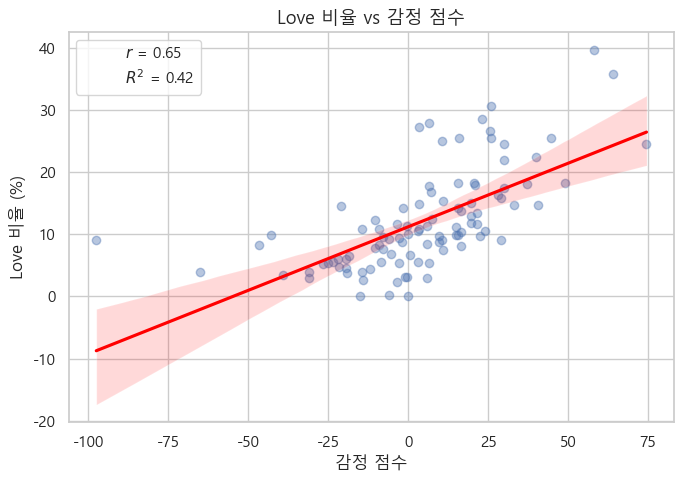

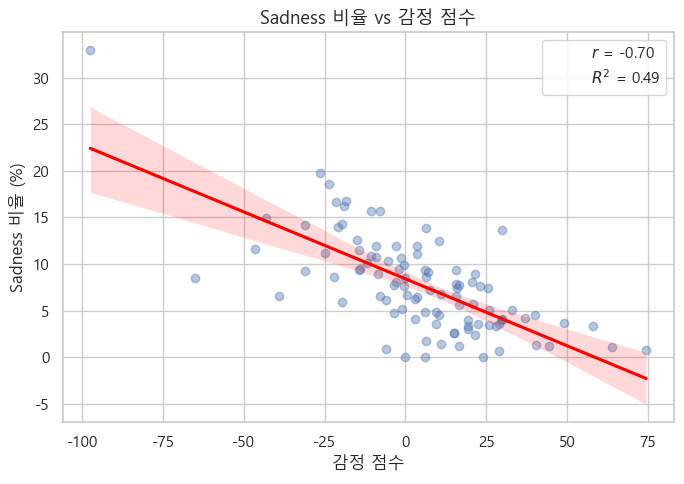

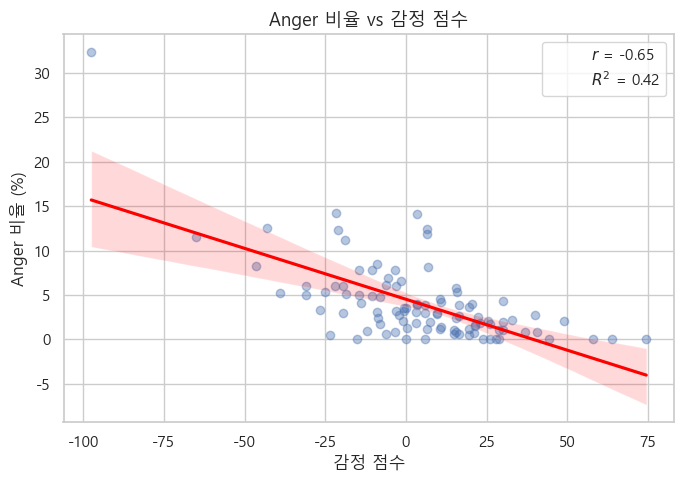

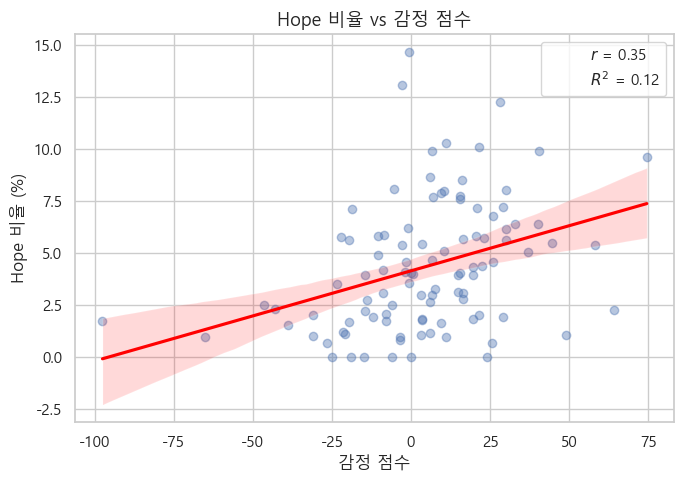

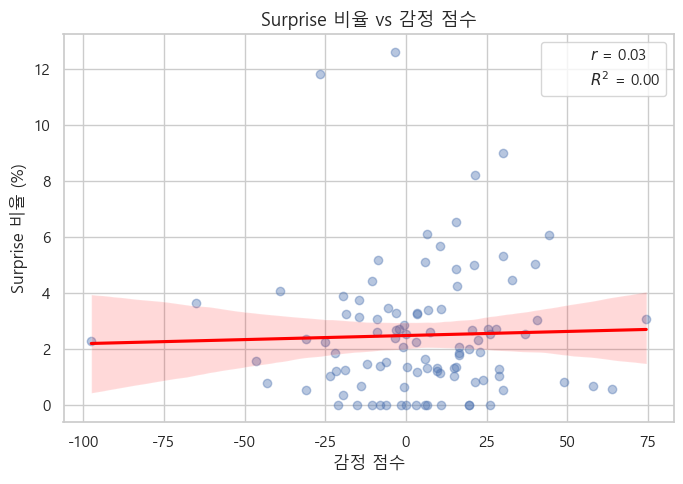

In [34]:
from scipy.stats import linregress

for emo in all_emotions:
    x = df["emotion_score"]
    y = df[f"ratio_{emo}"]

    slope, intercept, r_value, p_value, std_err = linregress(x, y)
    r_squared = r_value ** 2

    plt.figure(figsize=(7, 5))
    ax = sns.regplot(x=x, y=y, scatter_kws={"alpha": 0.4}, line_kws={"color": "red"})
    
    # 범례 추가용 (투명한 선 그래프에 label 붙이기)
    plt.plot([], [], ' ', label=f"$r$ = {r_value:.2f}")
    plt.plot([], [], ' ', label=f"$R^2$ = {r_squared:.2f}")

    plt.title(f"{emo.capitalize()} 비율 vs 감정 점수", fontsize=13)
    plt.xlabel("감정 점수")
    plt.ylabel(f"{emo.capitalize()} 비율 (%)")
    plt.legend(loc="best")
    plt.tight_layout()
    plt.show()

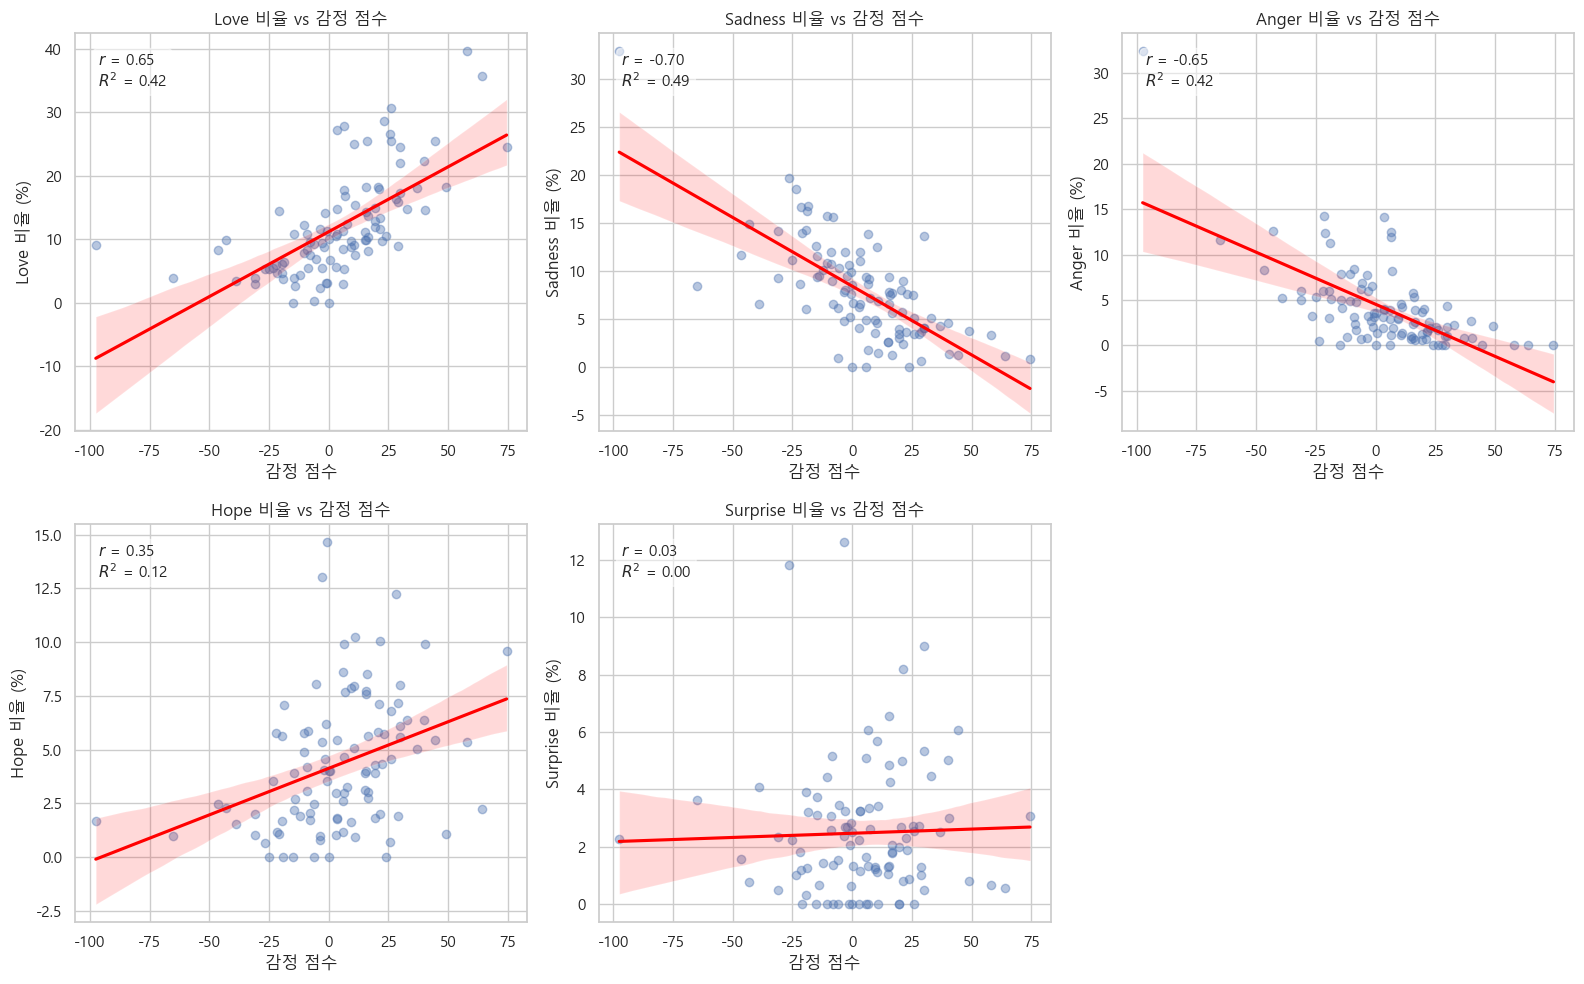

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import linregress

fig, axes = plt.subplots(2, 3, figsize=(16, 10))
axes = axes.flatten()

for i, emo in enumerate(all_emotions):
    ax = axes[i]
    x = df["emotion_score"]
    y = df[f"ratio_{emo}"]

    # 회귀 계산
    slope, intercept, r_value, p_value, std_err = linregress(x, y)
    r_squared = r_value ** 2

    # 회귀선 그래프
    sns.regplot(x=x, y=y, ax=ax, scatter_kws={"alpha": 0.4}, line_kws={"color": "red"})

    # 텍스트로 r, R² 표시
    ax.text(0.05, 0.95, f"$r$ = {r_value:.2f}\n$R^2$ = {r_squared:.2f}",
            transform=ax.transAxes, fontsize=11,
            verticalalignment='top', bbox=dict(boxstyle="round,pad=0.3", facecolor="white", alpha=0.5))

    ax.set_title(f"{emo.capitalize()} 비율 vs 감정 점수")
    ax.set_xlabel("감정 점수")
    ax.set_ylabel(f"{emo.capitalize()} 비율 (%)")

# 빈 subplot 제거 (5개만 사용하므로 6번째 subplot 비우기)
if len(all_emotions) < len(axes):
    for j in range(len(all_emotions), len(axes)):
        fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

### 감정 점수별 대표 노래

In [ ]:
N = 5  # 상위/하위 개수

# 감정 점수 기준 상위/하위 곡 추출
top_songs = df.sort_values(by="emotion_score", ascending=False).head(N)
bottom_songs = df.sort_values(by="emotion_score", ascending=True).head(N)

# 출력
print("🎵 감정 점수 TOP 5")
display(top_songs[["title", "artist", "emotion_score", "emotion_score_detail"]])

print("\n🎵 감정 점수 BOTTOM 5")
display(bottom_songs[["title", "artist", "emotion_score", "emotion_score_detail"]])

🎵 감정 점수 TOP 5


title               artist  emotion_score  \
69               Differences             Ginuwine           74.5   
40               These Words  Natasha Bedingfield           64.0   
63              Show Me Love             Robin S.           58.0   
18            Rock That Body      Black Eyed Peas           49.0   
66  I Can Love You Like That            All-4-One           44.5   

                                 emotion_score_detail  
69  {'love': 64, 'surprise': 8, 'hope': 25, 'sadne...  
40  {'love': 64, 'hope': 4, 'surprise': 1, 'sadnes...  
63  {'love': 59, 'hope': 8, 'sadness': 5, 'surpris...  
18  {'love': 69, 'sadness': 14, 'hope': 4, 'anger'...  
66  {'love': 42, 'surprise': 10, 'hope': 9, 'sadne...


🎵 감정 점수 BOTTOM 5


title                                             artist  \
16                  Crazy                                      K-Ci and JoJo   
47  Drop it Like it's Hot                          Snoop Dogg feat. Pharrell   
22                   Only  Nicki Minaj feat. Drake, Lil Wayne and Chris B...   
97              Don't Lie                                    Black Eyed Peas   
0                    Dude                         Beenie Man feat. Ms. Thing   

    emotion_score                               emotion_score_detail  
16          -97.5  {'love': 16, 'sadness': 58, 'anger': 57, 'hope...  
47          -65.0  {'sadness': 35, 'anger': 48, 'surprise': 15, '...  
22          -46.5  {'love': 37, 'sadness': 52, 'hope': 11, 'anger...  
97          -43.0  {'love': 26, 'anger': 33, 'sadness': 39, 'surp...  
0           -39.0  {'love': 18, 'sadness': 34, 'anger': 27, 'surp...

C:\Users\박상춘\AppData\Local\Temp\ipykernel_27000\1038536651.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="emotion_score", y="title_artist", data=top_songs, palette="Greens_d")


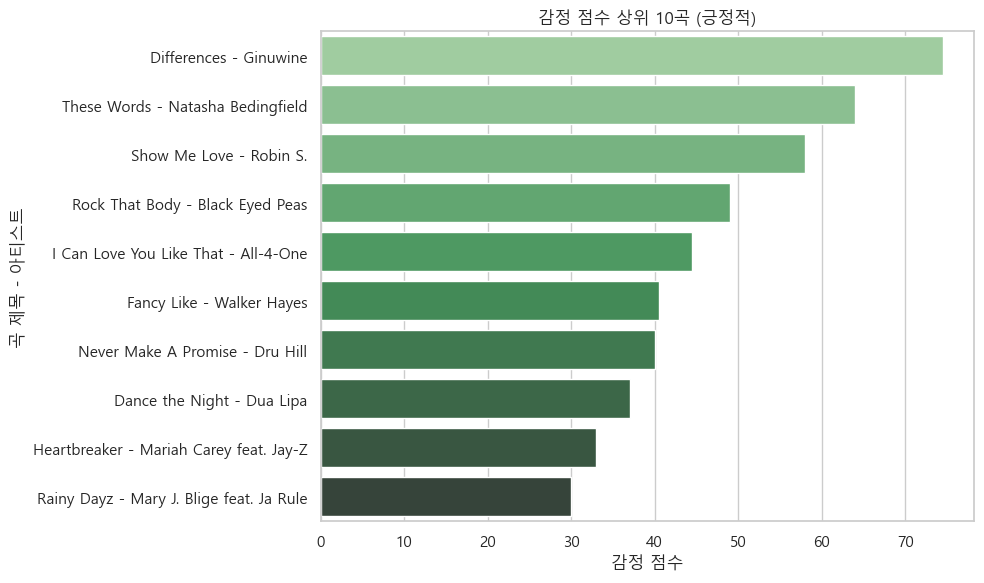

C:\Users\박상춘\AppData\Local\Temp\ipykernel_27000\1038536651.py:22: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="emotion_score", y="title_artist", data=bottom_songs, palette="Reds_d")


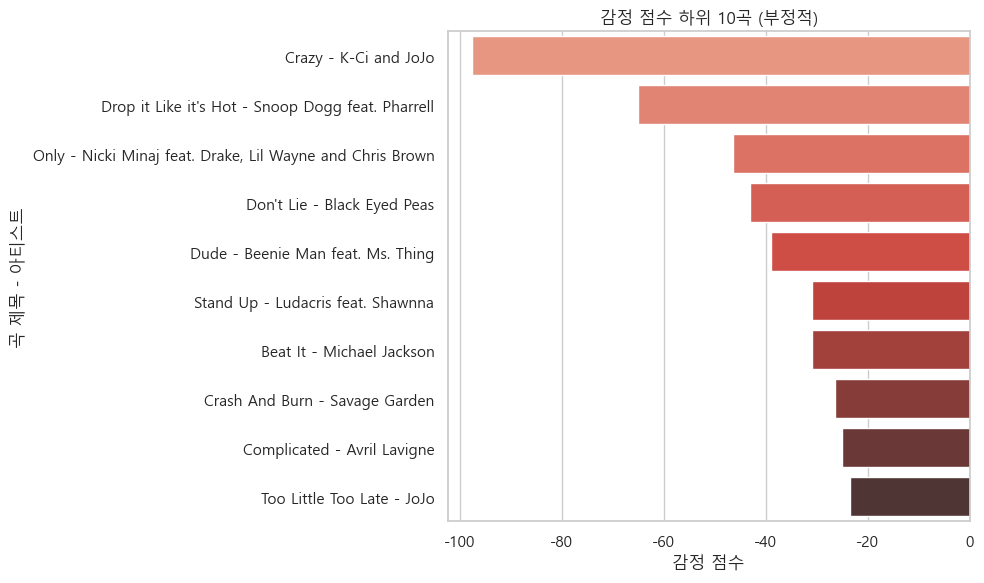

In [31]:
top_n = 10
bottom_n = 10

# title - artist 형식으로 새로운 컬럼 생성
df["title_artist"] = df["title"] + " - " + df["artist"]

# 상위/하위 N곡 추출
top_songs = df.nlargest(top_n, "emotion_score")
bottom_songs = df.nsmallest(bottom_n, "emotion_score")

# 시각화 - 상위 10곡
plt.figure(figsize=(10, 6))
sns.barplot(x="emotion_score", y="title_artist", data=top_songs, palette="Greens_d")
plt.title("감정 점수 상위 10곡 (긍정적)")
plt.xlabel("감정 점수")
plt.ylabel("곡 제목 - 아티스트")
plt.tight_layout()
plt.show()

# 시각화 - 하위 10곡
plt.figure(figsize=(10, 6))
sns.barplot(x="emotion_score", y="title_artist", data=bottom_songs, palette="Reds_d")
plt.title("감정 점수 하위 10곡 (부정적)")
plt.xlabel("감정 점수")
plt.ylabel("곡 제목 - 아티스트")
plt.tight_layout()
plt.show()

# 시각화 함수를 모듈화 한 후 전체 데이터에 적용

In [127]:
# 모듈 불러오기
import importlib; import visualization_utils as vu; importlib.reload(vu)

<module 'visualization_utils' from 'c:\\PARK\\School\\텍스트데이터분석을 위한 딥러닝\\개별 프로젝트\\Song Lyrics Sentiment Analysis\\analysis\\visualization_utils.py'>

In [105]:
# 데이터 불러오기
df = pd.read_pickle("../results/emotion_analysis.pkl")

# 감정군 목록
all_emotions = ["love", "sadness", "anger", "hope", "surprise"]

## 1. 감정군별 감정 단어 수 합계

c:\PARK\School\텍스트데이터분석을 위한 딥러닝\개별 프로젝트\Song Lyrics Sentiment Analysis\analysis\visualization_utils.py:27: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=list(totals.keys()), y=list(totals.values()), palette="Blues_d")


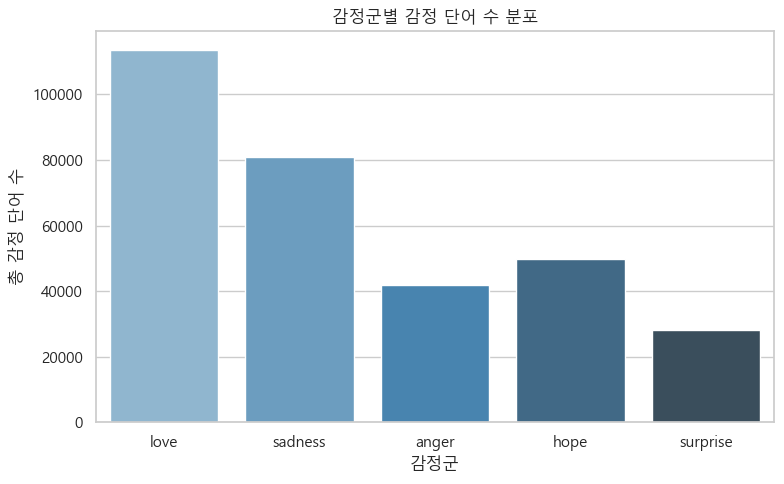

In [106]:
vu.plot_emotion_count_bar(df, all_emotions)

## 2. 감정군별 비율 분포

c:\PARK\School\텍스트데이터분석을 위한 딥러닝\개별 프로젝트\Song Lyrics Sentiment Analysis\analysis\visualization_utils.py:37: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=list(ratios.keys()), y=list(ratios.values()), palette="Oranges_d")


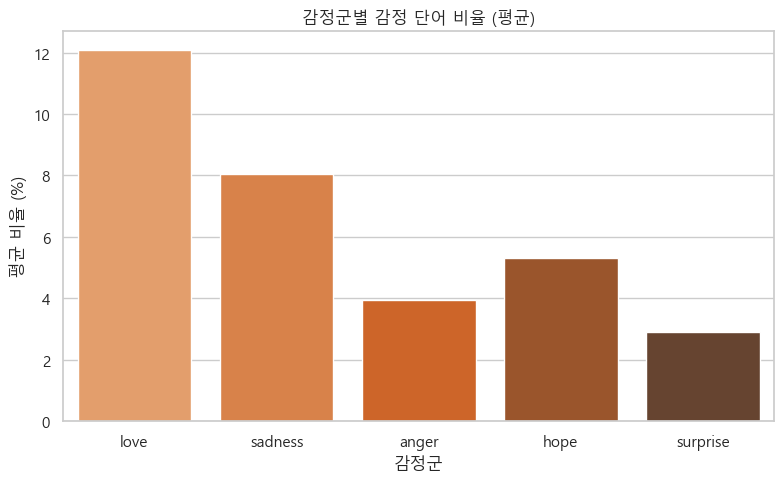

In [107]:
vu.plot_emotion_ratio_bar(df, all_emotions)

## 3. 전체감정 단어 WordCloud

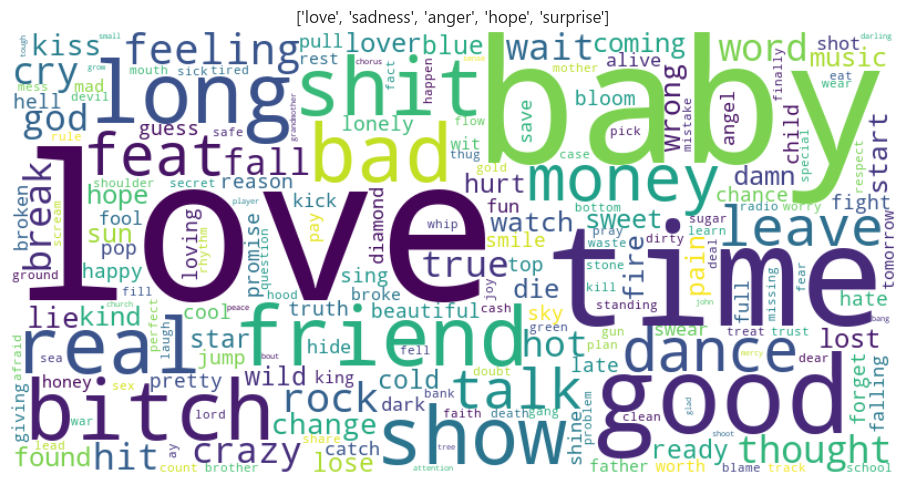

In [ ]:
vu.generate_overall_wordcloud(df, all_emotions)

## 4. 감정군별 감정 단어 WordCloud

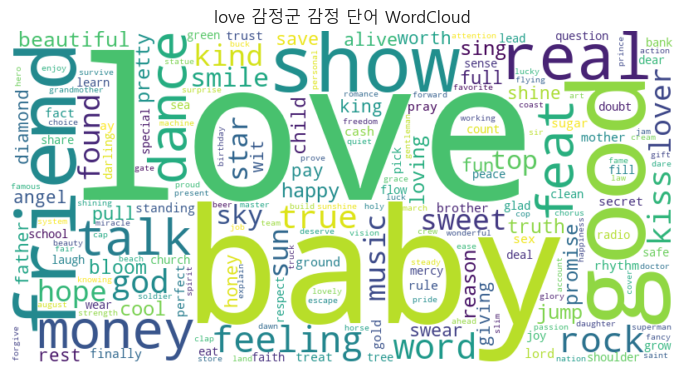

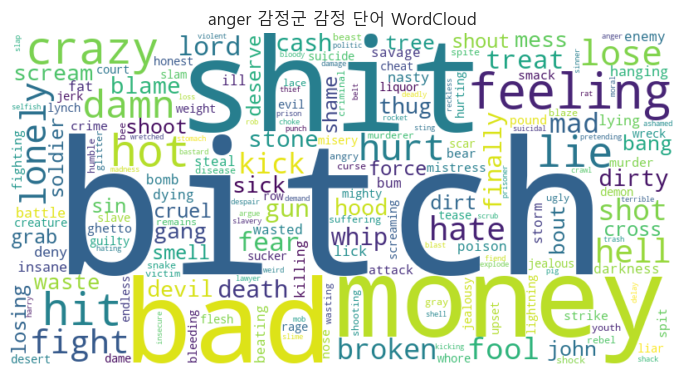

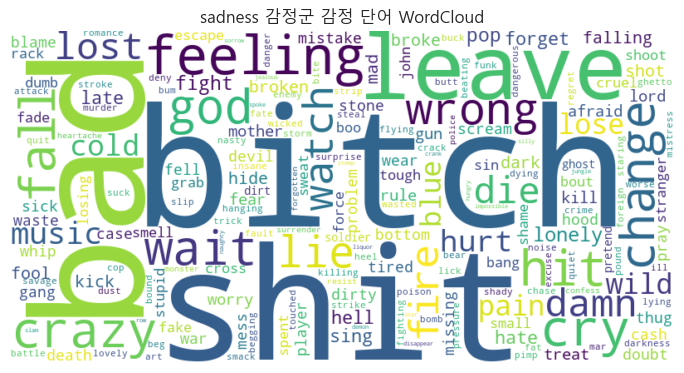

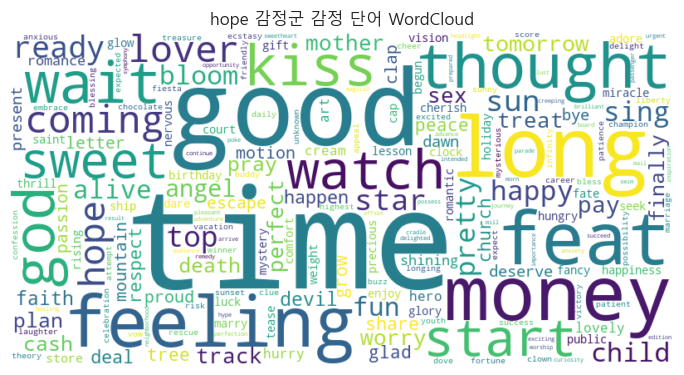

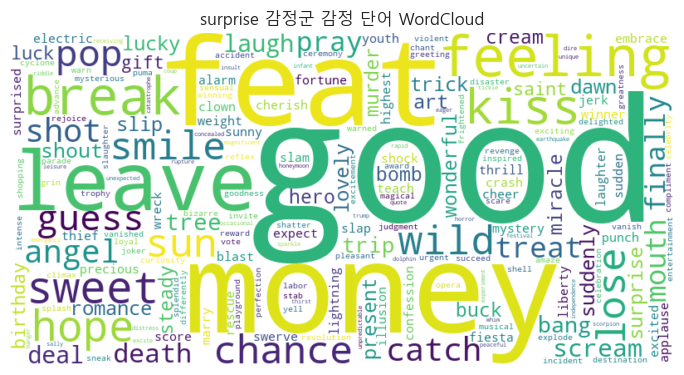

In [ ]:
vu.generate_grouped_wordclouds(df, "love")
vu.generate_grouped_wordclouds(df, "anger")
vu.generate_grouped_wordclouds(df, "sadness")
vu.generate_grouped_wordclouds(df, "hope")
vu.generate_grouped_wordclouds(df, "surprise")

## 5. 곡별 주요 감정 바 차트 (top-N 감정 단어 분포)

c:\PARK\School\텍스트데이터분석을 위한 딥러닝\개별 프로젝트\Song Lyrics Sentiment Analysis\analysis\visualization_utils.py:87: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=list(top_words.keys()), y=list(top_words.values()), palette="coolwarm")


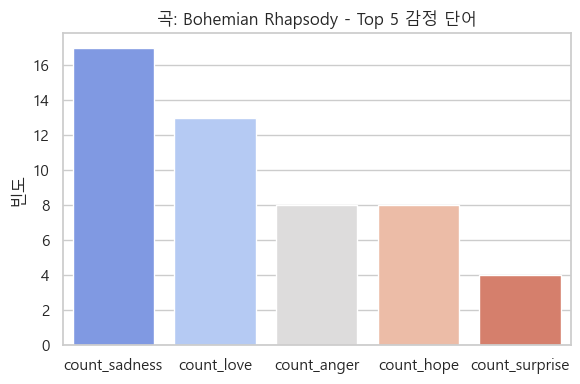

In [110]:
vu.plot_top_emotion_words_per_song(df, target_title="Bohemian Rhapsody")

## 6. 감정군별 감정 단어 수 상관관계 히트맵

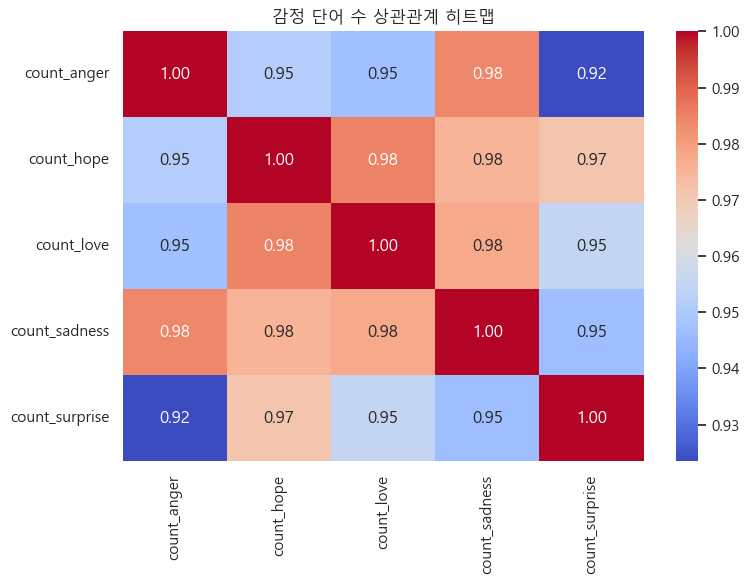

In [111]:
vu.plot_emotion_word_correlation(df)

## 7. 감정 점수 분포 히스토그램

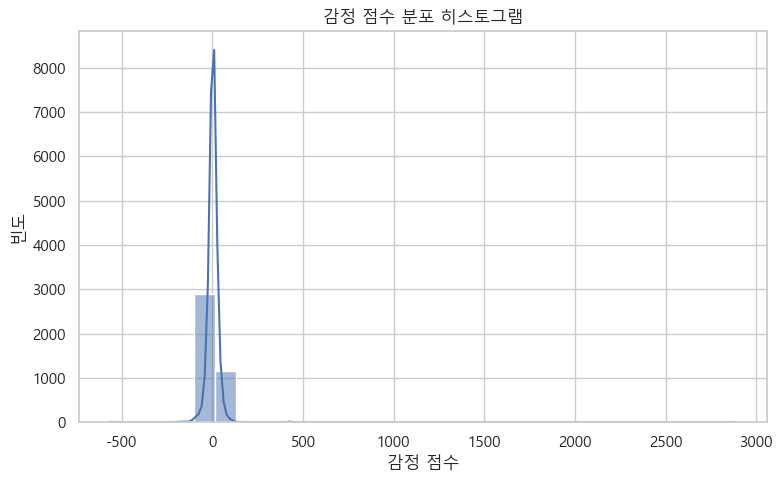

In [112]:
vu.plot_emotion_score_histogram(df) # 아웃라이어가 많음

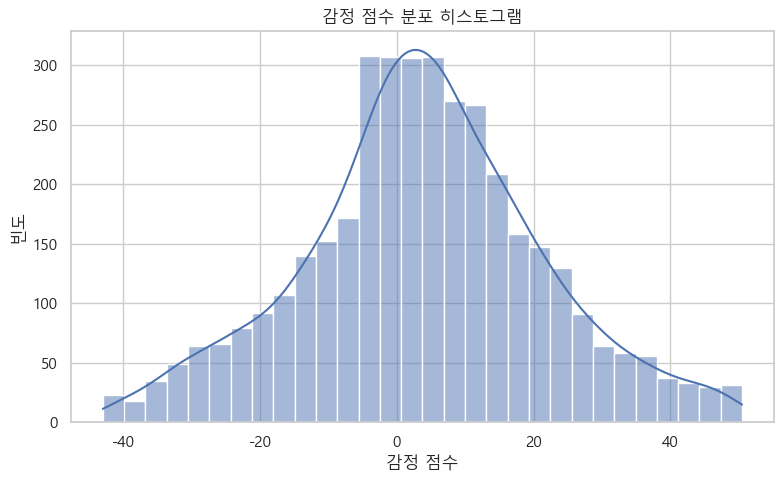

In [113]:
vu.plot_emotion_score_histogram(df, exclude_outliers=True)  # 아웃라이어 제외

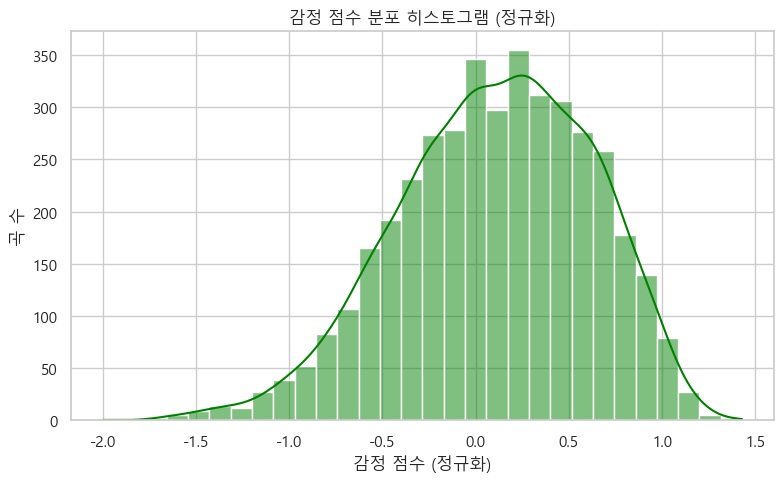

In [114]:
vu.plot_normalized_emotion_score_histogram(df)  # 정규화

## 8. 감정군별 평균 감정 점수 계산

c:\PARK\School\텍스트데이터분석을 위한 딥러닝\개별 프로젝트\Song Lyrics Sentiment Analysis\analysis\visualization_utils.py:148: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  plt.show()


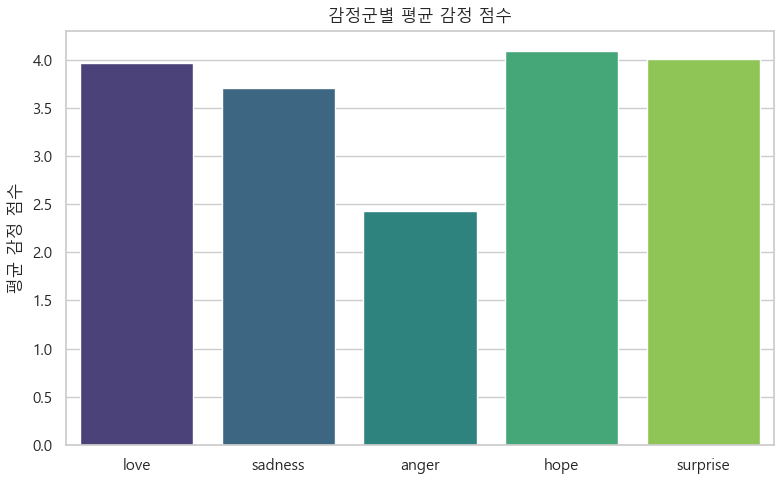

In [ ]:
vu.plot_avg_emotion_score(df, all_emotions)

## 9. 감정 점수에 따른 감정군별 비율 분포

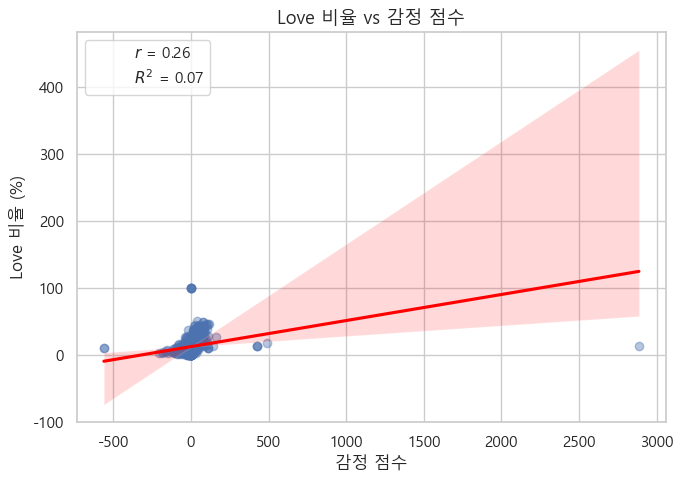

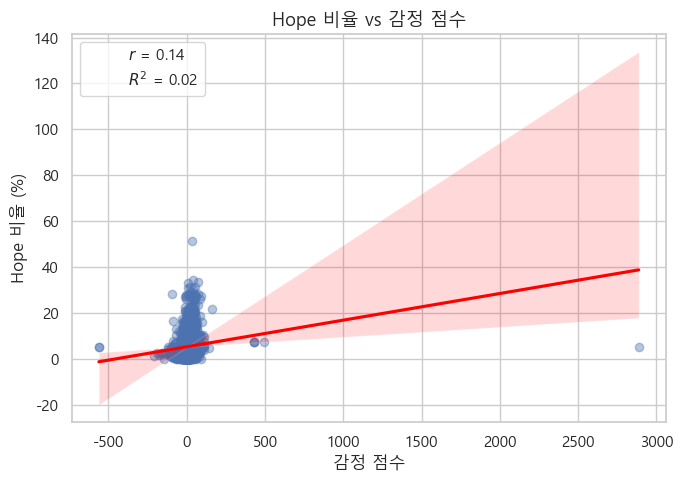

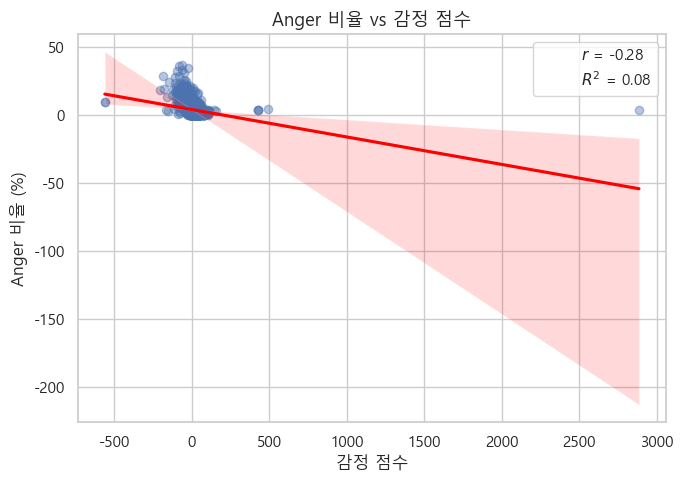

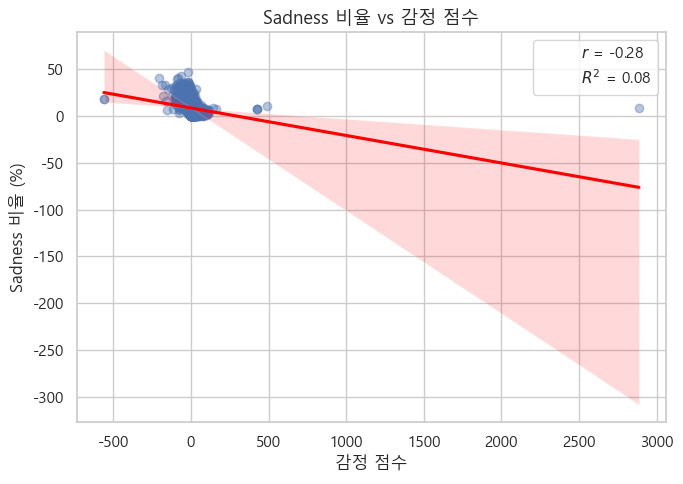

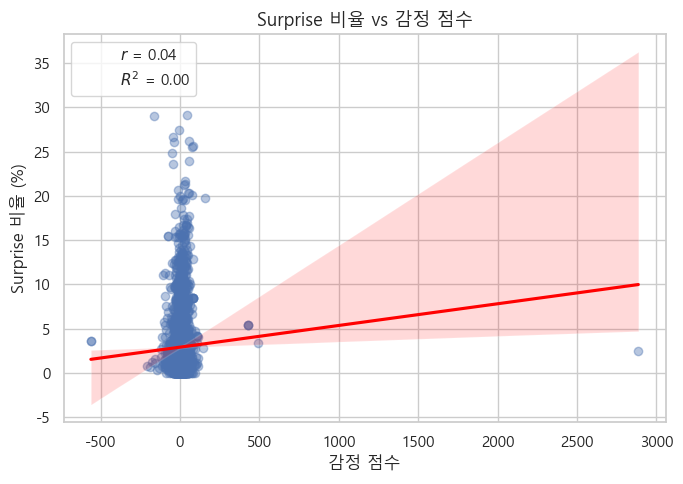

In [ ]:
# 아웃라이어 포함
vu.plot_emotion_ratio_vs_score(df, emotion_name="love")
vu.plot_emotion_ratio_vs_score(df, emotion_name="hope")
vu.plot_emotion_ratio_vs_score(df, emotion_name="anger")
vu.plot_emotion_ratio_vs_score(df, emotion_name="sadness")
vu.plot_emotion_ratio_vs_score(df, emotion_name="surprise")

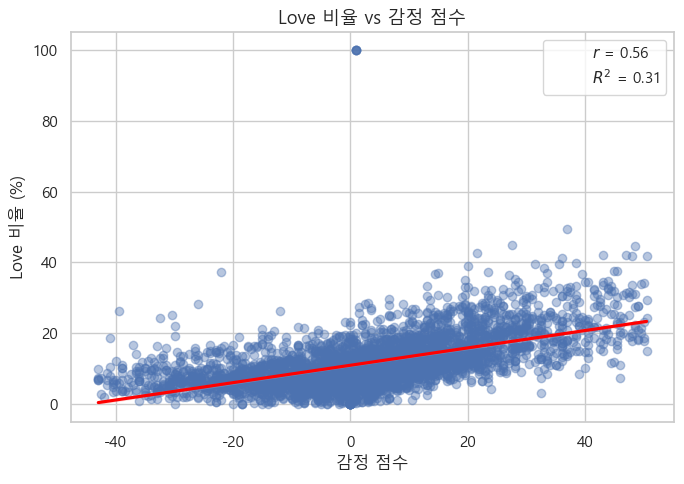

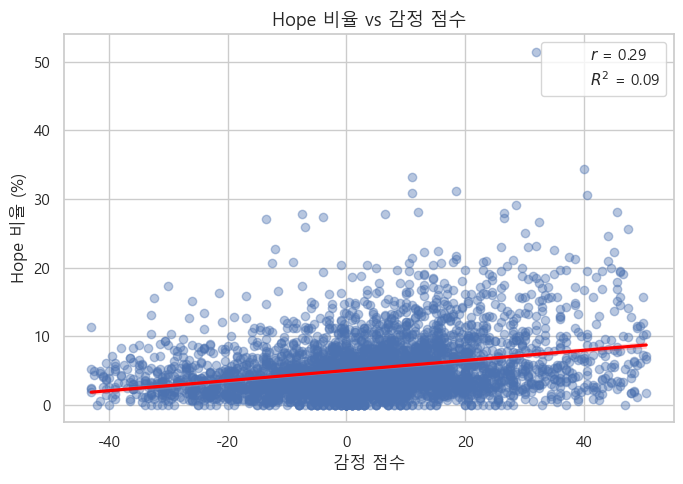

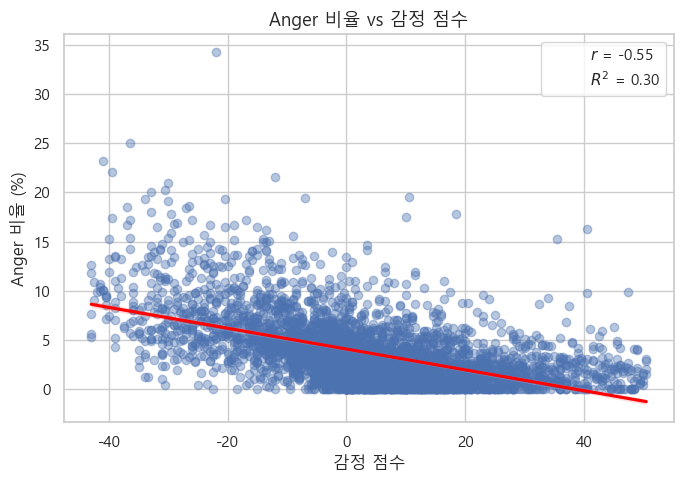

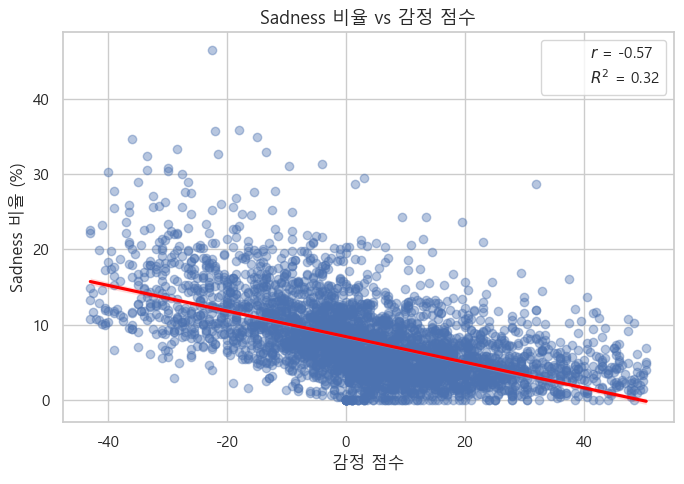

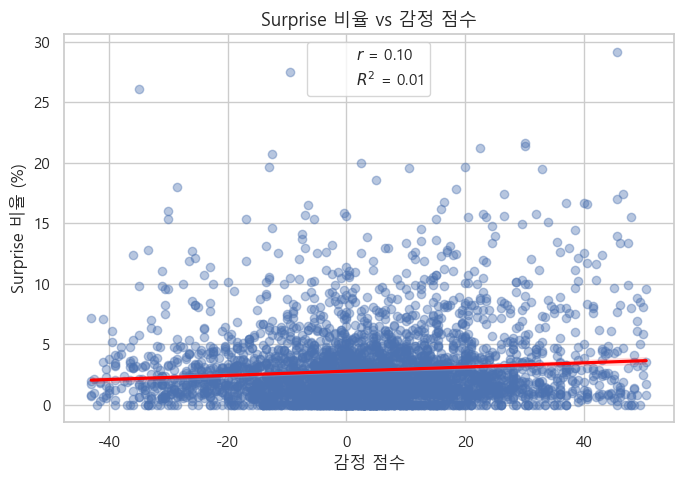

In [117]:
# 아웃라이어 제외
vu.plot_emotion_ratio_vs_score(df, emotion_name="love", exclude_outliers=True)
vu.plot_emotion_ratio_vs_score(df, emotion_name="hope", exclude_outliers=True)
vu.plot_emotion_ratio_vs_score(df, emotion_name="anger", exclude_outliers=True)
vu.plot_emotion_ratio_vs_score(df, emotion_name="sadness", exclude_outliers=True)
vu.plot_emotion_ratio_vs_score(df, emotion_name="surprise", exclude_outliers=True)

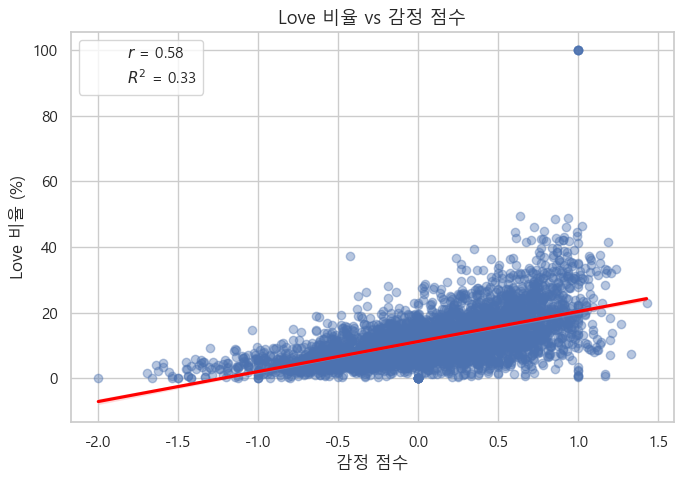

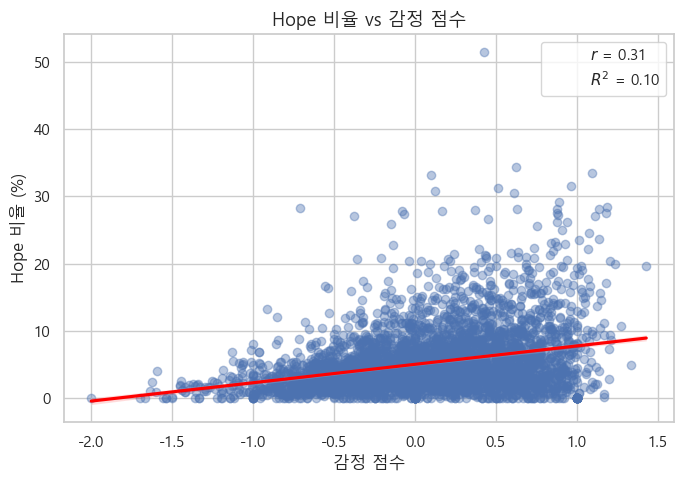

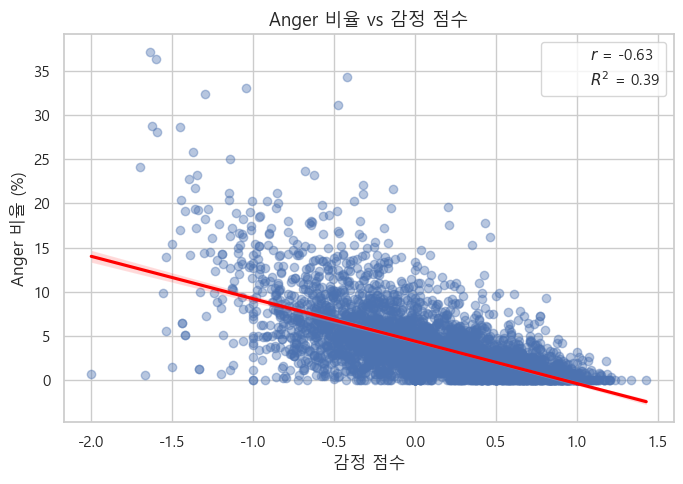

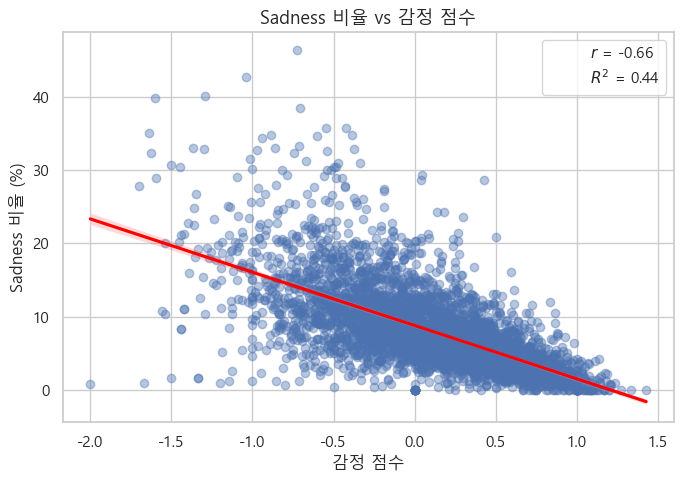

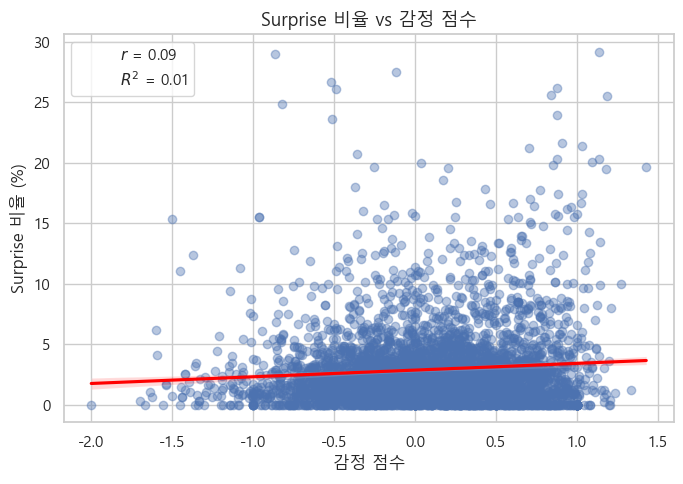

In [118]:
# 정규화
vu.plot_emotion_ratio_vs_normalized_score(df, emotion_name="love")
vu.plot_emotion_ratio_vs_normalized_score(df, emotion_name="hope")
vu.plot_emotion_ratio_vs_normalized_score(df, emotion_name="anger")
vu.plot_emotion_ratio_vs_normalized_score(df, emotion_name="sadness")
vu.plot_emotion_ratio_vs_normalized_score(df, emotion_name="surprise")

## 10. 감정 점수별 대표 노래

### 상위 5개

In [ ]:
# 아웃라이어 포함
vu.show_top_songs_by_emotion_score(df)

title  \
1644  Foolish Games / You Were Meant For Me   
1392   The Most Beautiful Girl In The World   
2382                           Lose Control   
3672                     Wake Up In The Sky   
649                           All Cried Out   

                                           artist  emotion_score  \
1644                                        Jewel         2886.5   
1392              Artist Formerly Known As Prince          491.0   
2382  Missy Elliott feat. Ciara and Fat Man Scoop          427.0   
3672        Gucci Mane X Bruno Mars X Kodak Black          427.0   
649        Lisa Lisa and Cult Jam With Full Force          427.0   

                                   emotion_score_detail  
1644  {'love': 8924, 'sadness': 5456, 'hope': 3399, ...  
1392  {'hope': 652, 'love': 1457, 'sadness': 894, 's...  
2382  {'sadness': 573, 'surprise': 430, 'hope': 580,...  
3672  {'sadness': 573, 'surprise': 430, 'hope': 580,...  
649   {'sadness': 573, 'surprise': 430, 'hope': 580,...

In [ ]:
# 아웃라이어 제거
vu.show_top_songs_by_emotion_score(df, exclude_outliers=True)

title               artist  \
3447                          Shape Of You           Ed Sheeran   
1500                        If You Love Me           Brownstone   
1072  (It's Just) The Way That You Love Me          Paula Abdul   
3473                           It Ain't Me  Kygo x Selena Gomez   
3059                          Back In Time              Pitbull   

      emotion_score                               emotion_score_detail  
3447           50.5  {'hope': 5, 'love': 71, 'sadness': 14, 'surpri...  
1500           50.5  {'sadness': 5, 'surprise': 1, 'hope': 9, 'love...  
1072           50.5  {'love': 58, 'sadness': 10, 'surprise': 7, 'ho...  
3473           50.5  {'love': 73, 'surprise': 47, 'hope': 51, 'sadn...  
3059           50.0  {'sadness': 8, 'love': 51, 'hope': 16, 'surpri...

In [ ]:
# 정규화
vu.show_top_songs_by_normalized_emotion_score(df)

title                            artist  \
2692       Shadow Of The Day                       Linkin Park   
2109            My Sacrifice                             Creed   
3996         I'm Good (Blue)       David Guetta and Bebe Rexha   
3122                Treasure                        Bruno Mars   
2749  Kiss Me Thru The Phone  Soulja Boy Tell 'em feat. Sammie   

      normalized_emotion_score  emotion_score  \
2692                  1.428571           20.0   
2109                  1.333333            8.0   
3996                  1.270833           30.5   
3122                  1.236111           44.5   
2749                  1.209302           52.0   

                                   emotion_score_detail  
2692           {'love': 14, 'surprise': 12, 'hope': 12}  
2109              {'love': 6, 'hope': 4, 'surprise': 1}  
3996           {'surprise': 14, 'hope': 15, 'love': 23}  
3122  {'love': 35, 'surprise': 1, 'hope': 21, 'sadne...  
2749  {'love': 42, 'surprise': 24, 'hope': 26, 'ange...

### 하위 5개

In [ ]:
# 아웃라이어 포함
vu.show_top_songs_by_emotion_score(df, is_bottom=True)

title                                artist  emotion_score  \
63            Fire Lake  Bob Seger and The Silver Bullet Band         -561.5   
305   Shame On The Moon  Bob Seger and The Silver Bullet Band         -561.5   
3044          Rack City                                  Tyga         -208.5   
2658          Disturbia                               Rihanna         -187.0   
2331              Roses                               OutKast         -179.0   

                                   emotion_score_detail  
63    {'sadness': 704, 'anger': 373, 'hope': 209, 'l...  
305   {'sadness': 704, 'anger': 373, 'hope': 209, 'l...  
3044  {'sadness': 152, 'anger': 69, 'love': 10, 'sur...  
2658  {'sadness': 105, 'anger': 93, 'surprise': 2, '...  
2331  {'sadness': 106, 'anger': 95, 'love': 18, 'hop...

In [ ]:
# 아웃라이어 제거
vu.show_top_songs_by_emotion_score(df, is_bottom=True, exclude_outliers=True)

title           artist  emotion_score  \
2164    No More Drama    Mary J. Blige          -43.0   
2446        Don't Lie  Black Eyed Peas          -43.0   
1637          Po Pimp        Do Or Die          -43.0   
3587         Stir Fry            Migos          -43.0   
2317  Leave (Get Out)             JoJo          -43.0   

                                   emotion_score_detail  
2164  {'sadness': 52, 'anger': 13, 'hope': 12, 'love...  
2446  {'love': 26, 'anger': 33, 'sadness': 39, 'surp...  
1637  {'sadness': 55, 'surprise': 8, 'love': 29, 'an...  
3587  {'love': 30, 'sadness': 45, 'surprise': 3, 'ho...  
2317  {'love': 13, 'surprise': 14, 'hope': 22, 'sadn...

In [ ]:
# 정규화
vu.show_top_songs_by_normalized_emotion_score(df, is_bottom=True)

title                            artist  \
4006  Ella Baila Sola     Eslabon Armado and Peso Pluma   
3583       Gucci Gang                          Lil Pump   
3654         Goodbyes  Post Malone Featuring Young Thug   
462      Cruel Summer                        Bananarama   
2658        Disturbia                           Rihanna   

      normalized_emotion_score  emotion_score  \
4006                 -2.000000           -2.0   
3583                 -1.697674         -146.0   
3654                 -1.666667           -5.0   
462                  -1.637500          -65.5   
2658                 -1.626087         -187.0   

                                   emotion_score_detail  
4006                         {'sadness': 1, 'anger': 1}  
3583  {'sadness': 81, 'anger': 70, 'love': 5, 'surpr...  
3654                         {'sadness': 3, 'anger': 2}  
462   {'anger': 36, 'love': 4, 'surprise': 1, 'hope'...  
2658  {'sadness': 105, 'anger': 93, 'surprise': 2, '...